In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import Data using BeautifulSoup

For this project I am scraping data on Chocolate using BeautifulSoup.

In [2]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage.content, 'html.parser')

In [3]:
all_rating_tags = soup.find_all(attrs={'class':'Rating'})
ratings = []
for tag in all_rating_tags[1:]:
  ratings.append(float(tag.get_text()))

#### What ratings are most frequent

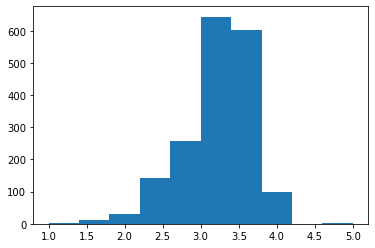

In [4]:
plt.hist(ratings)
plt.show()

#### Next I will build a dataframe to see which companies have the highest ratings

In [5]:
company_tags = soup.select(".Company")
companies = []
for company in company_tags[1:]:
  companies.append(company.get_text())

In [6]:
cacao = {"Company": companies, "Rating": ratings}
cacao_df = pd.DataFrame.from_dict(cacao)

In [7]:
cacao_gb = cacao_df.groupby('Company').Rating.mean()

In [8]:
cacao_gb.nlargest(10)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64

In [9]:
cocoa_per = soup.select(".CocoaPercent")
cocoa_percents = []

for td in cocoa_per[1:]:
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)

In [10]:
cacoa2 = {"Company": companies, "Rating": ratings, "CocoaPercentage": cocoa_percents}
cacao2_df = pd.DataFrame.from_dict(cacoa2)

#### I'm building a scatter plot to see if there is a relation between rating and amount of Cocoa used

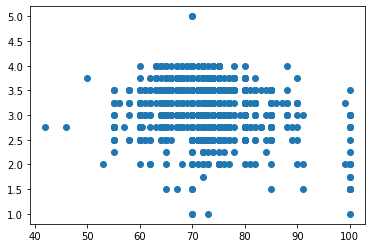

In [11]:
plt.scatter(cacao2_df.CocoaPercentage, cacao2_df.Rating)
plt.show()

#### It was hard to identify in the scatter plot if there was a relation so I'll use numpy to identify a trend.

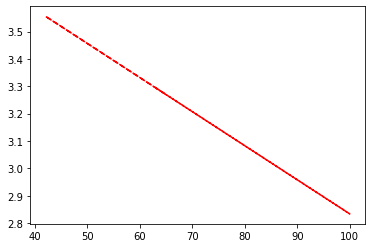

In [12]:
z = np.polyfit(cacao2_df.CocoaPercentage, cacao2_df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(cacao2_df.CocoaPercentage, line_function(cacao2_df.CocoaPercentage), "r--")

#### I'm going to limit the amount of analysis for now, this project was geared towards scraping data from the web. 